# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99871., 100434.,  99648., 100049., 100133.,  99817.,  99876.,
         99809.,  99798., 100565.]),
 array([ 1.00010674, 10.90009097, 20.8000752 , 30.70005943, 40.60004366,
        50.50002789, 60.40001212, 70.29999635, 80.19998058, 90.09996481,
        99.99994904]),
 <BarContainer object of 10 artists>)

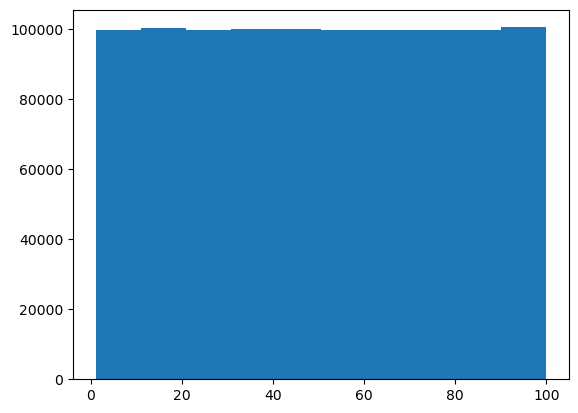

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(1000000)

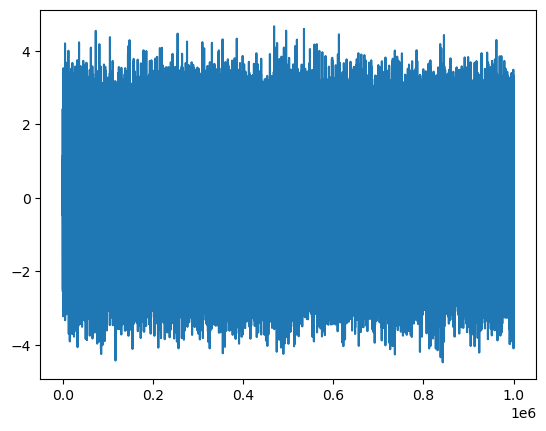

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([2.09000e+02, 3.86200e+03, 3.73200e+04, 1.64875e+05, 3.31110e+05,
        3.05793e+05, 1.29421e+05, 2.50730e+04, 2.24400e+03, 9.30000e+01]),
 array([-4.47259373, -3.55955332, -2.64651291, -1.7334725 , -0.8204321 ,
         0.09260831,  1.00564872,  1.91868912,  2.83172953,  3.74476994,
         4.65781035]),
 <BarContainer object of 10 artists>)

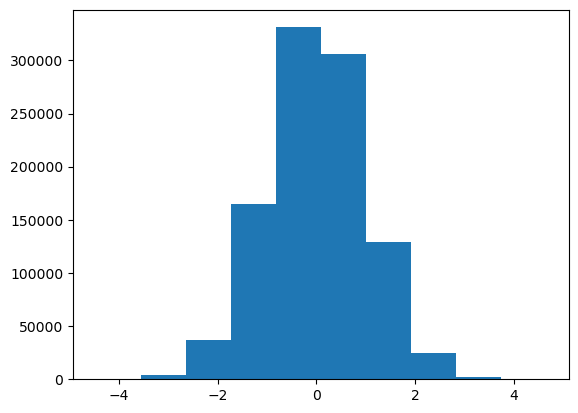

In [6]:
%matplotlib inline
plt.hist(data)

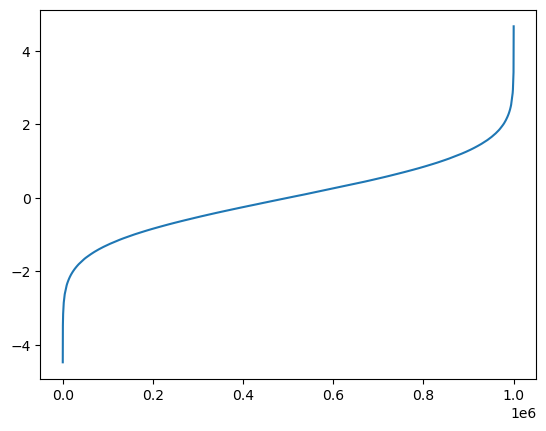

In [7]:
plt.plot(x,sorted(data))

(array([2.000e+00, 3.900e+01, 3.390e+02, 1.266e+03, 2.747e+03, 3.160e+03,
        1.792e+03, 5.590e+02, 8.400e+01, 1.200e+01]),
 array([-5.19781448, -3.12833542, -1.05885637,  1.01062269,  3.08010174,
         5.14958079,  7.21905985,  9.2885389 , 11.35801796, 13.42749701,
        15.49697606]),
 <BarContainer object of 10 artists>)

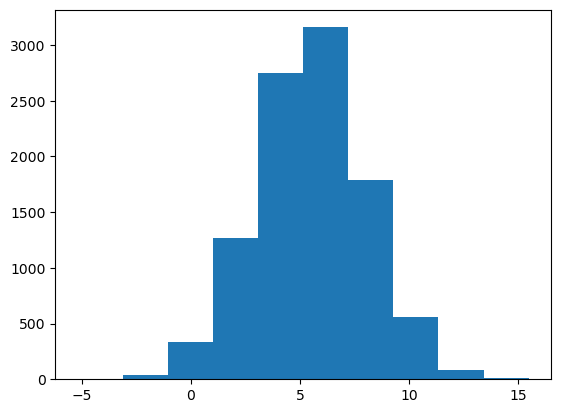

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 0.89429414,  1.17706674,  0.6488223 , -1.27358483],
       [ 0.98384982, -2.07922373, -0.31385289,  1.1283127 ]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1396559999999987


(3.1396559999999987, [<matplotlib.lines.Line2D at 0x29d943050>])

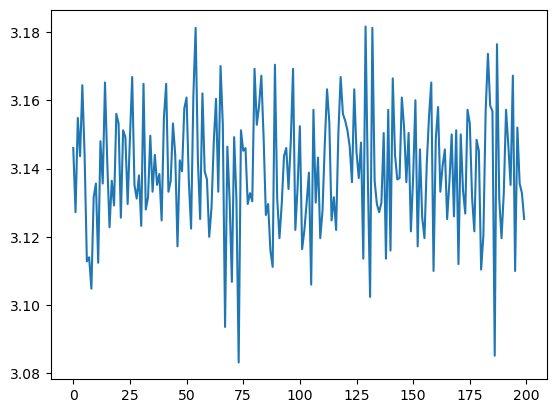

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [12]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000443,1.500104,18.491907
std,1.000261,2.500749,7.796261
min,-4.678613,-10.847429,5.000049
25%,-0.672943,-0.186246,11.743427
50%,0.000482,1.497335,18.490284
75%,0.674374,3.187806,25.243603
max,4.738765,13.321661,31.999928


(array([9.10000e+01, 2.55800e+03, 2.91050e+04, 1.49131e+05, 3.30987e+05,
        3.22597e+05, 1.37635e+05, 2.57360e+04, 2.07400e+03, 8.60000e+01]),
 array([-4.67861346, -3.73687562, -2.79513778, -1.85339995, -0.91166211,
         0.03007572,  0.97181356,  1.91355139,  2.85528923,  3.79702707,
         4.7387649 ]),
 <BarContainer object of 10 artists>)

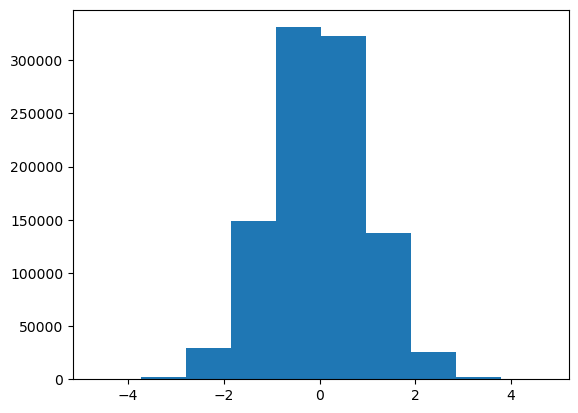

In [14]:
plt.hist(data["A"])

(array([3.30000e+01, 1.30800e+03, 1.92200e+04, 1.21554e+05, 3.16542e+05,
        3.46369e+05, 1.61162e+05, 3.12980e+04, 2.42900e+03, 8.50000e+01]),
 array([-10.84742922,  -8.43052017,  -6.01361112,  -3.59670207,
         -1.17979302,   1.23711604,   3.65402509,   6.07093414,
          8.48784319,  10.90475224,  13.32166129]),
 <BarContainer object of 10 artists>)

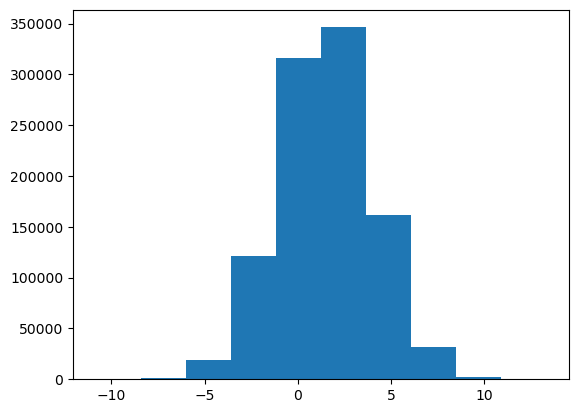

In [15]:
plt.hist(data["B"])

(array([100469.,  99848., 100004., 100286.,  99754., 100078.,  99876.,
         99872.,  99642., 100171.]),
 array([ 5.00004865,  7.70003663, 10.40002462, 13.1000126 , 15.80000058,
        18.49998857, 21.19997655, 23.89996454, 26.59995252, 29.2999405 ,
        31.99992849]),
 <BarContainer object of 10 artists>)

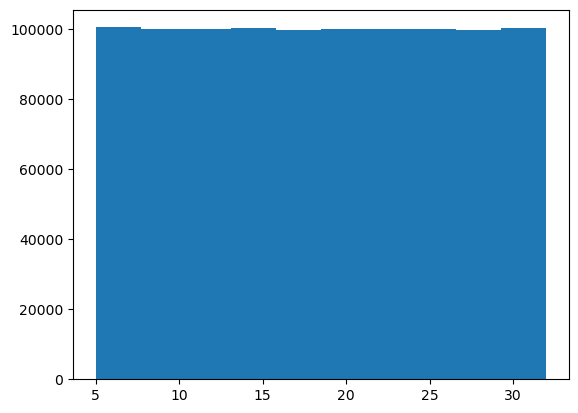

In [16]:
plt.hist(data["C"])

In [17]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist()

In [20]:
a = len(colum_names)
a

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [22]:
new_data

,Column Name,A,B
42,State,-0.423691,0.351966
43,Account Length,2.047386,0.928394
44,Area Code,0.857529,0.355736
45,Phone,-0.438103,0.404887
46,Int'l Plan,-0.069032,0.713060
47,VMail Plan,0.089258,0.553462
48,VMail Message,-1.004085,0.005381
49,Day Mins,-1.749816,0.921048
50,Day Calls,0.015664,0.524554
51,Day Charge,1.579901,0.737018
